In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:100, :2].T  # we only take the first two features.
y = iris.target[:100]

In [3]:
# y = np.where(y == 0, 1, -1)
y = y.reshape(1,100)

In [34]:
class NN():
    
    def __init__(self, I, H, O, lr = 0.01, epochs = 10000):
        self.W1 = np.random.random((H,I)) * 2 - 1
        self.W2 = np.random.random((O,H)) * 2 - 1
        self.b = np.random.random((1,2)) * 2 - 1
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, x, deriv = False):
        if deriv == True:
            return x * (1-x)
        return 1/(1 + np.exp(-x))
    
    def Train(self, X, y):
        
        for e in range(self.epochs):
            
            z1 = np.dot(self.W1,X) + self.b[0][0]
            a1 = self.sigmoid(z1)
            z2 = np.dot(self.W2,a1) + self.b[0][1]
            a2 = self.sigmoid(z2)

            error_o = (y - a2)
            deltao = error_o * self.sigmoid(a2,True)

            error_h = np.dot(self.W2.T,error_o)
            deltah = error_h * self.sigmoid(a1,True)

            self.W2 += self.lr * np.dot(deltao,a1.T)
            self.W1 += self.lr * np.dot(deltah,X.T)

            self.b[0][0] += self.lr * np.sum(deltah)
            self.b[0][1] += self.lr * np.sum(deltao)

            if e % (self.epochs/10) == 0:
                J = ((np.sum(y - a2))**2)/2
                print(J)
        
    def FeedForward(self,X):
        z1 = np.dot(self.W1,X) + self.b[0][0]
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.W2,a1) + self.b[0][1]
        a2 = self.sigmoid(z2)
        return a2

In [35]:
nn = NN(2,2,1,lr = 0.01,epochs = 100000)

In [36]:
nn.Train(X,y)
np.round(nn.FeedForward(X))

4.138592057748961
0.20406015075696346
0.05310618112561782
0.02688471354084072
0.017126064618463867
0.012232586470952562
0.009353283245905786
0.007481438933940942
0.006178817505254248
0.0052264310452855645


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [37]:
a2 = nn.FeedForward(X)

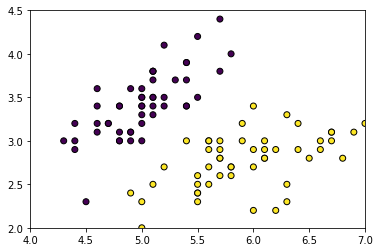

In [38]:
x = np.linspace(-10, 10, 1000)
plt.axis([4, 7, 2,4.5])
# plt.plot(x, -(nn.W1[0][0] * x )/nn.W1[0][1])
plt.scatter(X.T[:, 0], X.T[:, 1],c = y.reshape(100), edgecolor='k')
# plot_decision_regions(X, y, classifier=pn)

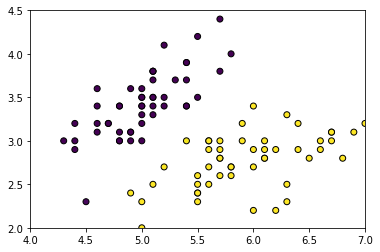

In [39]:
x = np.linspace(-10, 10, 1000)
plt.axis([4, 7, 2,4.5])
# plt.plot(x, -(nn.W1[0][0] * x )/nn.W1[0][1])
plt.scatter(X.T[:, 0], X.T[:, 1],c = nn.FeedForward(X).reshape(100), edgecolor='k')
# plot_decision_regions(X, y, classifier=pn)